# Transfer learning for feature extraction

### Extracting object count and coverage from images

In [ ]:
from skimage import io, filters
from scipy import ndimage
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
sampleImage = 'cropped_images_mean/croped_56_mean.png'

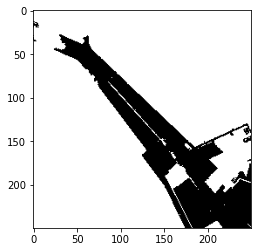

In [26]:
im = io.imread(sampleImage)
val = filters.threshold_otsu(im)
drops = ndimage.binary_fill_holes(im < val)
plt.imshow(drops, cmap='gray')
plt.show()

In [27]:
labels = measure.label(drops)
print(labels.max())
print('coverage is %f' %(drops.mean()))

25
coverage is 0.804752


### Update mean image dataset with new features

In [28]:
full = pd.read_csv('full-dataset.csv')
full.head()

,filename,max-b,max-g,max-r,mean-b,mean-g,mean-r,c-count,mean-fileName,mean-value,horizontal-fileName,vertical-fileName
0,croped_1.jpg,2557.0,2347.0,1921.0,129.70,135.56,146.11,4541,cropped_images_mean/croped_1_mean.png,2344.0,cropped_images_edge_horizontal/croped_1_edge_h...,cropped_images_edge_vertical/croped_1_edge_ver...
1,croped_10.jpg,985.0,1078.0,807.0,113.37,123.27,126.20,26686,cropped_images_mean/croped_10_mean.png,941.0,cropped_images_edge_horizontal/croped_10_edge_...,cropped_images_edge_vertical/croped_10_edge_ve...
2,croped_100.jpg,953.0,906.0,703.0,85.88,93.24,92.08,22931,cropped_images_mean/croped_100_mean.png,1015.0,cropped_images_edge_horizontal/croped_100_edge...,cropped_images_edge_vertical/croped_100_edge_v...
3,croped_1000.jpg,678.0,670.0,632.0,113.26,118.70,125.69,31745,cropped_images_mean/croped_1000_mean.png,748.0,cropped_images_edge_horizontal/croped_1000_edg...,cropped_images_edge_vertical/croped_1000_edge_...
4,croped_1001.jpg,1425.0,920.0,974.0,67.86,76.96,72.56,11097,cropped_images_mean/croped_1001_mean.png,740.0,cropped_images_edge_horizontal/croped_1001_edg...,cropped_images_edge_vertical/croped_1001_edge_...


In [37]:
objectData = list()
coverageData = list()

for file in full['mean-fileName']:
    im = io.imread(file)
    val = filters.threshold_otsu(im)
    drops = ndimage.binary_fill_holes(im < val)
    objectData.append(measure.label(drops).max())
    coverageData.append(drops.mean())

full['object-count'] = objectData
full['coverage'] = coverageData

In [38]:
full.to_csv(r'full-dataset.csv', index = False)

In [39]:
full = pd.read_csv('full-dataset.csv')
full.head()

,filename,max-b,max-g,max-r,mean-b,mean-g,mean-r,c-count,mean-fileName,mean-value,horizontal-fileName,vertical-fileName,object-count,coverage
0,croped_1.jpg,2557.0,2347.0,1921.0,129.70,135.56,146.11,4541,cropped_images_mean/croped_1_mean.png,2344.0,cropped_images_edge_horizontal/croped_1_edge_h...,cropped_images_edge_vertical/croped_1_edge_ver...,35,0.132192
1,croped_10.jpg,985.0,1078.0,807.0,113.37,123.27,126.20,26686,cropped_images_mean/croped_10_mean.png,941.0,cropped_images_edge_horizontal/croped_10_edge_...,cropped_images_edge_vertical/croped_10_edge_ve...,95,0.691664
2,croped_100.jpg,953.0,906.0,703.0,85.88,93.24,92.08,22931,cropped_images_mean/croped_100_mean.png,1015.0,cropped_images_edge_horizontal/croped_100_edge...,cropped_images_edge_vertical/croped_100_edge_v...,132,0.712080
3,croped_1000.jpg,678.0,670.0,632.0,113.26,118.70,125.69,31745,cropped_images_mean/croped_1000_mean.png,748.0,cropped_images_edge_horizontal/croped_1000_edg...,cropped_images_edge_vertical/croped_1000_edge_...,156,0.573520
4,croped_1001.jpg,1425.0,920.0,974.0,67.86,76.96,72.56,11097,cropped_images_mean/croped_1001_mean.png,740.0,cropped_images_edge_horizontal/croped_1001_edg...,cropped_images_edge_vertical/croped_1001_edge_...,248,0.624704


## Extract contours from images

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
full = pd.read_csv('full-dataset.csv')
full.head()

,filename,max-b,max-g,max-r,mean-b,mean-g,mean-r,c-count,mean-fileName,mean-value,horizontal-fileName,vertical-fileName,object-count,coverage,contours-count
0,croped_1.jpg,2557.0,2347.0,1921.0,129.70,135.56,146.11,4541,cropped_images_mean/croped_1_mean.png,2344.0,cropped_images_edge_horizontal/croped_1_edge_h...,cropped_images_edge_vertical/croped_1_edge_ver...,35,0.132192,62
1,croped_10.jpg,985.0,1078.0,807.0,113.37,123.27,126.20,26686,cropped_images_mean/croped_10_mean.png,941.0,cropped_images_edge_horizontal/croped_10_edge_...,cropped_images_edge_vertical/croped_10_edge_ve...,95,0.691664,72
2,croped_100.jpg,953.0,906.0,703.0,85.88,93.24,92.08,22931,cropped_images_mean/croped_100_mean.png,1015.0,cropped_images_edge_horizontal/croped_100_edge...,cropped_images_edge_vertical/croped_100_edge_v...,132,0.712080,11
3,croped_1000.jpg,678.0,670.0,632.0,113.26,118.70,125.69,31745,cropped_images_mean/croped_1000_mean.png,748.0,cropped_images_edge_horizontal/croped_1000_edg...,cropped_images_edge_vertical/croped_1000_edge_...,156,0.573520,137
4,croped_1001.jpg,1425.0,920.0,974.0,67.86,76.96,72.56,11097,cropped_images_mean/croped_1001_mean.png,740.0,cropped_images_edge_horizontal/croped_1001_edg...,cropped_images_edge_vertical/croped_1001_edge_...,248,0.624704,139


48


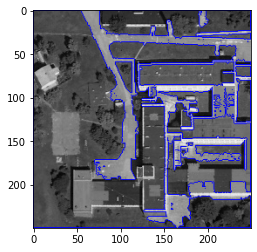

In [42]:
img = cv2.imread(full['mean-fileName'][25])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,1)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

for cnt in contours:
    cv2.drawContours(img,[cnt],0,(0,0,255),1)
    
print(len(contours))
    
plt.imshow(img, cmap='gray')
plt.show()

In [43]:
countoursData = list()

for file in full['mean-fileName']:
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,127,255,1)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
    countoursData.append(len(contours))

full['contours-count'] = countoursData

In [44]:
full.to_csv(r'full-dataset.csv', index = False)

In [45]:
full = pd.read_csv('full-dataset.csv')
full.head()

,filename,max-b,max-g,max-r,mean-b,mean-g,mean-r,c-count,mean-fileName,mean-value,horizontal-fileName,vertical-fileName,object-count,coverage,contours-count
0,croped_1.jpg,2557.0,2347.0,1921.0,129.70,135.56,146.11,4541,cropped_images_mean/croped_1_mean.png,2344.0,cropped_images_edge_horizontal/croped_1_edge_h...,cropped_images_edge_vertical/croped_1_edge_ver...,35,0.132192,62
1,croped_10.jpg,985.0,1078.0,807.0,113.37,123.27,126.20,26686,cropped_images_mean/croped_10_mean.png,941.0,cropped_images_edge_horizontal/croped_10_edge_...,cropped_images_edge_vertical/croped_10_edge_ve...,95,0.691664,72
2,croped_100.jpg,953.0,906.0,703.0,85.88,93.24,92.08,22931,cropped_images_mean/croped_100_mean.png,1015.0,cropped_images_edge_horizontal/croped_100_edge...,cropped_images_edge_vertical/croped_100_edge_v...,132,0.712080,11
3,croped_1000.jpg,678.0,670.0,632.0,113.26,118.70,125.69,31745,cropped_images_mean/croped_1000_mean.png,748.0,cropped_images_edge_horizontal/croped_1000_edg...,cropped_images_edge_vertical/croped_1000_edge_...,156,0.573520,137
4,croped_1001.jpg,1425.0,920.0,974.0,67.86,76.96,72.56,11097,cropped_images_mean/croped_1001_mean.png,740.0,cropped_images_edge_horizontal/croped_1001_edg...,cropped_images_edge_vertical/croped_1001_edge_...,248,0.624704,139
